In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!ls '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab4_Files/'


gridB.bmp  gridR.bmp  Part1.ipynb  PeppersBayerGray.bmp
gridG.bmp  lena.png   Part2.ipynb  PeppersRGB.bmp


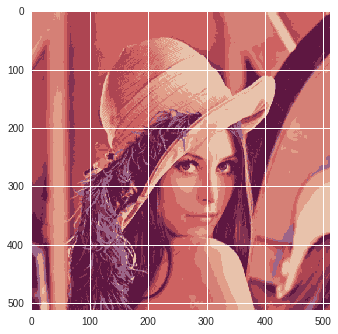

In [3]:
#version1: three for loop to generate colour error

import os
from sklearn.cluster import KMeans
from scipy import spatial
from skimage import io, color, img_as_float
import numpy as np
import matplotlib.pyplot as plt
from math import floor


# Finds the closest colour in the palette using kd-tree.
def nearest(palette, colour):
    dist, i = palette.query(colour)
    return palette.data[i]

# Make a kd-tree palette from the provided list of colours
def makePalette(colours):
    #print(colours)
    return spatial.KDTree(colours)

# Dynamically calculates and N-colour palette for the given image
# Uses the KMeans clustering algorithm to determine the best colours
# Returns a kd-tree palette with those colours
def findPalette(image, nColours):
    #your code
    
    data = image.ravel().reshape(-1, 3)
    kmeans = KMeans(n_clusters=nColours, random_state=0, tol=.01).fit(data)
    colour = kmeans.cluster_centers_
    
    
    return makePalette(colour)



def FloydSteinbergDitherColor(pixel, palette):
  width, height, *rest = image.shape
  error = np.zeros(3)
  for y in range(height):
    for x in range(width):
      oldpixel = image[x][y]
      new = nearest(palette, oldpixel) # Determine the new colour for the current pixel
      
      # Set the new pixel's colour
      pixel[x][y] = new
      # Now we distribute that error to the neighbouring pixels (if they exist) with specific weights
      for i in range (0,2):
        # Compute the error between the new colour and the existing one
        error[i] = oldpixel[i] -new[i]
        
        try:
          pixel[x + 1][y] += error * 7 / 16
          #pixel[x + 1][y][1] += error[1] * 7 / 16
          #pixel[x + 1][y][2] += error[2] * 7 / 16
        except IndexError:
          pass
      
        try:
          pixel[x - 1][y + 1] += error * 3 / 16
          #pixel[x - 1][y + 1][1] += error[1] * 3 / 16
          #pixel[x - 1][y + 1][2] += error[2] * 3 / 16
        except IndexError:
          pass
      
        try:
          pixel[x][y + 1] += error * 5 / 16
          #pixel[x][y + 1][1] += error[1] * 5 / 16
          #pixel[x][y + 1][2] += error[2] * 5 / 16
        except IndexError:
          pass
        try:
          pixel[x + 1][y + 1] += error * 1 / 16
          #pixel[x + 1][y + 1][1] += error[1] * 1 / 16
          #pixel[x + 1][y + 1][2] += error[2] * 1 / 16
        except IndexError:
          pass

  return pixel
      
  
#   for each y from top to bottom ==>(height)
#    for each x from left to right ==> (width)
#       oldpixel  := pixel[x][y]
#       newpixel  := nearest(oldpixel) # Determine the new colour for the current pixel
#       pixel[x][y]  := newpixel 
#       quant_error  := oldpixel - newpixel
#       pixel[x + 1][y    ] := pixel[x + 1][y    ] + quant_error * 7 / 16
#       pixel[x - 1][y + 1] := pixel[x - 1][y + 1] + quant_error * 3 / 16
#       pixel[x    ][y + 1] := pixel[x    ][y + 1] + quant_error * 5 / 16
#       pixel[x + 1][y + 1] := pixel[x + 1][y + 1] + quant_error * 1 / 16




if __name__ == "__main__":
  
    nColours = 8 # The number colours: change to generate a dynamic palette

    imfile = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab4_Files/lena.png' 

    
    image = io.imread(imfile)

    # Strip the alpha channel if it exists
    image = image[:,:,:3]

    # Convert the image from 8bits per channel to floats in each channel for precision
    image = img_as_float(image)

    # Dynamically generate an N colour palette for the given image
    palette = findPalette(image, nColours)
    colours = palette.data
    
    colours = img_as_float([colours.astype(np.ubyte)])[0]
    
    img = FloydSteinbergDitherColor(image, palette)

    plt.imshow(img)
    plt.show()

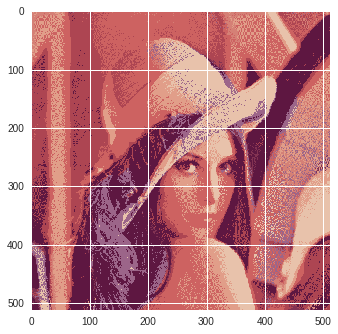

In [4]:
#version2: only two for loop to generate colour error

import os
from sklearn.cluster import KMeans
from scipy import spatial
from skimage import io, color, img_as_float
import numpy as np
import matplotlib.pyplot as plt
from math import floor


# Finds the closest colour in the palette using kd-tree.
def nearest(palette, colour):
    dist, i = palette.query(colour)
    return palette.data[i]

# Make a kd-tree palette from the provided list of colours
def makePalette(colours):
    #print(colours)
    return spatial.KDTree(colours)

# Dynamically calculates and N-colour palette for the given image
# Uses the KMeans clustering algorithm to determine the best colours
# Returns a kd-tree palette with those colours
def findPalette(image, nColours):
    #your code
    
    data = image.ravel().reshape(-1, 3)
    kmeans = KMeans(n_clusters=nColours, random_state=0, tol=.01).fit(data)
    colour = kmeans.cluster_centers_
    
    
    return makePalette(colour)



def FloydSteinbergDitherColor(pixel, palette):
  width, height, *rest = image.shape
  error = np.zeros(3)
  for y in range(height):
    for x in range(width):
      oldpixel = image[x][y]
      new = nearest(palette, oldpixel) # Determine the new colour for the current pixel
      # Compute the error between the new colour and the existing one
      
      error = [oldpixel[0] - new[0], oldpixel[1] - new[1], oldpixel[2] - new[2]]
      # Set the new pixel's colour
      pixel[x][y] = new
      # Now we distribute that error to the neighbouring pixels (if they exist) with specific weights
      try:
        pixel[x + 1][y][0] += error[0] * 7 / 16
        pixel[x + 1][y][1] += error[1] * 7 / 16
        pixel[x + 1][y][2] += error[2] * 7 / 16
      except IndexError:
        pass
      
      try:
        pixel[x - 1][y + 1][0] += error[0] * 3 / 16
        pixel[x - 1][y + 1][1] += error[1] * 3 / 16
        pixel[x - 1][y + 1][2] += error[2] * 3 / 16
      except IndexError:
        pass
      
      try:
        pixel[x][y + 1][0] += error[0] * 5 / 16
        pixel[x][y + 1][1] += error[1] * 5 / 16
        pixel[x][y + 1][2] += error[2] * 5 / 16
      except IndexError:
        pass
      try:
        pixel[x + 1][y + 1][0] += error[0] * 1 / 16
        pixel[x + 1][y + 1][1] += error[1] * 1 / 16
        pixel[x + 1][y + 1][2] += error[2] * 1 / 16
      except IndexError:
        pass

  return pixel
      
  
#   for each y from top to bottom ==>(height)
#    for each x from left to right ==> (width)
#       oldpixel  := pixel[x][y]
#       newpixel  := nearest(oldpixel) # Determine the new colour for the current pixel
#       pixel[x][y]  := newpixel 
#       quant_error  := oldpixel - newpixel
#       pixel[x + 1][y    ] := pixel[x + 1][y    ] + quant_error * 7 / 16
#       pixel[x - 1][y + 1] := pixel[x - 1][y + 1] + quant_error * 3 / 16
#       pixel[x    ][y + 1] := pixel[x    ][y + 1] + quant_error * 5 / 16
#       pixel[x + 1][y + 1] := pixel[x + 1][y + 1] + quant_error * 1 / 16




if __name__ == "__main__":
  
    nColours = 8 # The number colours: change to generate a dynamic palette

    imfile = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab4_Files/lena.png' 

    
    image = io.imread(imfile)

    # Strip the alpha channel if it exists
    image = image[:,:,:3]

    # Convert the image from 8bits per channel to floats in each channel for precision
    image = img_as_float(image)

    # Dynamically generate an N colour palette for the given image
    palette = findPalette(image, nColours)
    colours = palette.data
    
    colours = img_as_float([colours.astype(np.ubyte)])[0]
    
    img = FloydSteinbergDitherColor(image, palette)

    plt.imshow(img)
    plt.show()

In [0]:
#just test
#not answer in here

import os
from sklearn.cluster import KMeans
from scipy import spatial
from skimage import io, color, img_as_float
import numpy as np
import matplotlib.pyplot as plt
from math import floor


imfile = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab4_Files/lena.png' 

    
image = io.imread(imfile)

# Strip the alpha channel if it exists
image = image[:,:,:3]

# Convert the image from 8bits per channel to floats in each channel for precision
img = img_as_float(image)
#print(img)
img = img.ravel().reshape(-1,3)
#print(img)

def red(img):
  img[:,:,1]=0
  img[:,:,2]=0
  return img
def green(img):
  img[:,:,0]=0
  img[:,:,2]=0
  return img
def blue(img):
  img[:,:,0]=0
  img[:,:,1]=0
  return img

img = red(image)

io.imshow(img)
e = np.zeros(3)
print(e)